In [1]:
# setup some librairies and display options
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# be careful we will only print the first 5 digits and round small numbers in arrays
np.set_printoptions(suppress=True, precision=5)

# libraries to make things interactive
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Latex, Markdown

# a nice function to print pretty matrices in latex
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return str(''.join(rv))

def pmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{pmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{pmatrix}']
    return str(''.join(rv))

A rotation matrix can be used to describe the relative orientation of a frame with respect to another. Each column of a rotation matrix contains to the coordinates of one axis of the rotated frame with respect to the original frame.

Rotation matrices are typically used for three different purposes
1. To describe the orientation of a frame with respect to another
2. To rotate a point, a vector or a rigid body
3. To change coordinates

We give example of all of these uses in 2D below

# Rotations in 2D
The only possible rotations in 2D are rotations around an axis orthogonal to the plane. A rotation of $\theta$  can be written as the rotation matrix $$R(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

First we write a function that creates a 2D rotation matrix

In [2]:
def get_rotation_2D(theta):
    """This function gets an angle and returns a rotation matrix representing a 2D rotation of theta"""
    return np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# we can get and print a rotation of theta=pi/4
R = get_rotation_2D(np.pi/4.)

display(Markdown('we can get and print a rotation of ' + r'$\theta=\frac{\pi}{4}$'))
display(Markdown('$R = ' + bmatrix(R) + '$'))

we can get and print a rotation of $\theta=\frac{\pi}{4}$

$R = \begin{bmatrix}  0.70711 & -0.70711\\  0.70711 & 0.70711\\\end{bmatrix}$

## Properties of rotation matrices
We can also verify that for any random $\theta$, the matrix is orthogonal and has determinant equal to 1

In [3]:
theta = np.random.uniform(0, 2*np.pi)
R = get_rotation_2D(theta)


display(Markdown(r'$\theta = $' + f'{theta}\n'))
display(Markdown('$R = ' + bmatrix(R) + '$'))
display(Markdown('$R \cdot R^T = ' + bmatrix(R@R.T) + '$'))
display(Markdown('$R^T \cdot R = ' + bmatrix(R.T@R) + '$'))

print(f'det(R) = {np.linalg.det(R)}')

$\theta = $3.543883927876214


$R = \begin{bmatrix}  -0.92017 & 0.39153\\  -0.39153 & -0.92017\\\end{bmatrix}$

$R \cdot R^T = \begin{bmatrix}  1. & 0.\\  0. & 1.\\\end{bmatrix}$

$R^T \cdot R = \begin{bmatrix}  1. & -0.\\  -0. & 1.\\\end{bmatrix}$

det(R) = 1.0


## 1) Orientation of a frame B with respect to a frame S

The code below creates an interactive figure to visualize the orientation of a frame B with respect to another S and how the coordinates of a point moving with frame B changes when written in frame S.

<IPython.core.display.Javascript object>


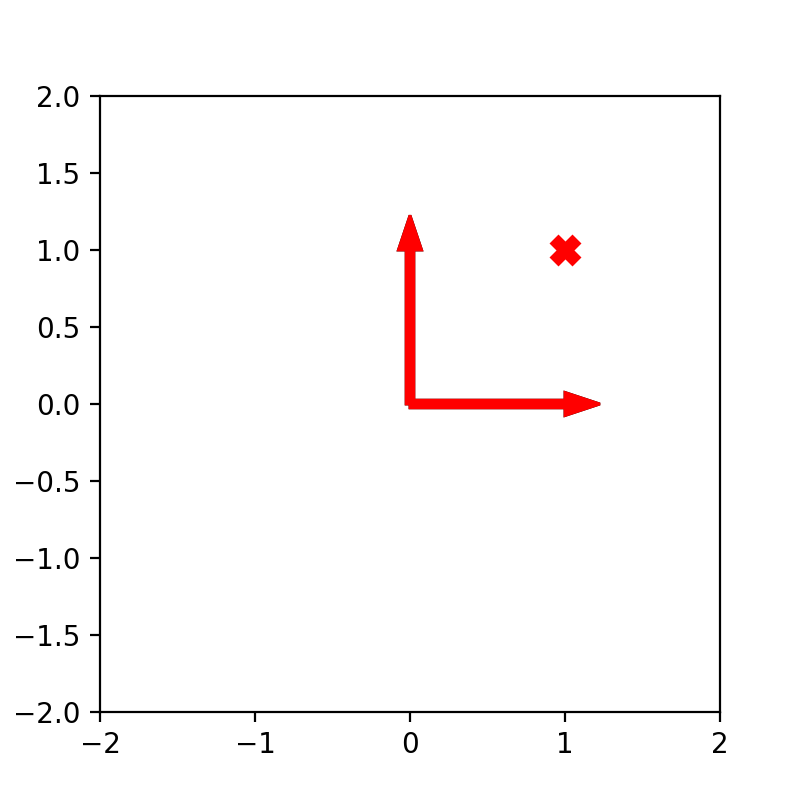

### Illustration of orientation of a frame B with respect to a frame S

The frame S is displayed in black and the frame B in red

The frame B is displayed by plotting the x and y vectors as defined by the columns of $R_{SB}$

Use the slider to change the orientation theta

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.3, min=-6.3, step=0.01), Output()), _d…

<function __main__.<lambda>(theta)>

In [4]:
def display_frame(ax, theta):
    R = get_rotation_2D(theta)
    # x-y axes of the base frame
    x_base = [1,0]
    y_base = [1,0]
    x_new = R[:,0]
    y_new = R[:,1]
    
    p = [1,1]
    p_new = R.dot(p)
    
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.arrow(0,0,1,0,width=0.05, color='k')
    ax.arrow(0,0,0,1,width=0.05, color='k')
    ax.arrow(0,0,x_new[0],x_new[1],width=0.05, color='r')
    ax.arrow(0,0,y_new[0],y_new[1],width=0.05, color='r')
    ax.plot(p_new[0],p_new[1], '-rX', ms=10, lw=4)
    display(Markdown('$R_{SB} = ' + bmatrix(R) + '$'))
    return display(Markdown(r'The red cross has coordinates $\begin{pmatrix}1\\1\end{pmatrix}$ in the red frame and coordinates $R_{SB}\cdot \begin{pmatrix}1\\1\end{pmatrix}=' + pmatrix(np.array([[p_new[0]],[p_new[1]]])) + '$ in the black frame'))
    
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
display(Markdown('### Illustration of orientation of a frame B with respect to a frame S'))
display(Markdown('The frame S is displayed in black and the frame B in red'))
display(Markdown('The frame B is displayed by plotting the x and y vectors as defined by the columns of $R_{SB}$'))
display(Markdown('Use the slider to change the orientation theta'))
interact(lambda theta: display_frame(ax, theta), theta=(-6.3,6.3,0.01))

## 2) Rotate a point, vector or rigid body
In this example, we display a rigid body (i.e. a finite collection of points in our case). We simply compute the rotation matrix R and then multiply the coordinates of each point p that belongs to the body by R to get the new position of the rotated point $$p' = R \cdot p$$

<IPython.core.display.Javascript object>


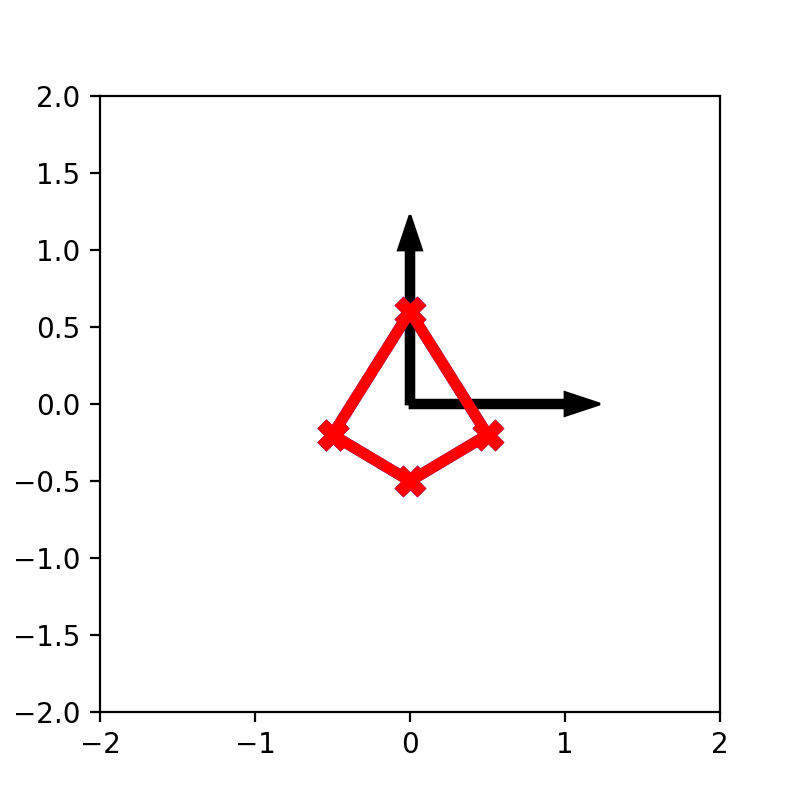

### Illustration of the rotation of an object

The original body is displayed in blue and the rotated one in red

Use the slider to change the center mx, my of the original body and theta to rotate the body with respect to the origin of the coordinate frame

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.3, min=-6.3, step=0.01), FloatSlider(v…

<function __main__.<lambda>(theta, mx, my)>

In [5]:
def display_rotated_body(ax, theta, mx, my):
    R = get_rotation_2D(theta)
    # x-y axes of the base frame
    body = np.array([[-0.5+mx, mx, 0.5+mx, mx, -0.5+mx],[my-0.2, my-0.5, my-0.2, my+0.6, my-0.2]])
    body_prime = R @ body
    
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.arrow(0,0,1,0,width=0.05, color='k')
    ax.arrow(0,0,0,1,width=0.05, color='k')
    
    ax.plot(body[0,:], body[1,:], '-bX', ms=10, lw=4)
    ax.plot(body_prime[0,:], body_prime[1,:], '-rX', ms=10, lw=4)
    
    display(Markdown('The rotation matrix is $R = ' + bmatrix(R) + '$'))
    display(Markdown('The coordinates of points (each column is one point) for the original body are:\n\n' + '$ p^0 = ' + bmatrix(body) + '$'))
    return display(Markdown('The coordinates of the points of the rotated body are computed as $p^1 = R \cdot p^0$ which gives:\n\n $p^1 = '+ bmatrix(R) +'\cdot'+bmatrix(body)+' = '+bmatrix(body_prime)+'$'))

    
fig = plt.figure(figsize=[4,4])
ax2 = fig.add_subplot(111)
display(Markdown('### Illustration of the rotation of an object'))
display(Markdown('The original body is displayed in blue and the rotated one in red'))
display(Markdown('Use the slider to change the center mx, my of the original body and theta to rotate the body with respect to the origin of the coordinate frame'))
interact(lambda theta, mx, my: display_rotated_body(ax2, theta, mx, my), theta=(-6.3,6.3,0.01), mx=(-1.,1), my=(-1.,1))